In [2]:
import pandas as pd
import numpy as numpy

df=pd.read_csv('../data/modelling_dataset.csv',index_col=0)

In [3]:
df.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,var_6m_price_peak,var_6m_price_mid_peak,days_to_contract_end,days_from_last_modification,days_activ,days_renewal,average_yearly_price,total_cost,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,channel_1,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,9.953056e+01,4.423670e+01,138,89,958,220,0.099372,0.000000,0.020057,3.700961
1,channel_2,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,1.217891e-03,0.000000e+00,214,2352,2352,151,0.117546,547.764166,-0.003767,0.177779
2,channel_1,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,9.450150e-08,0.000000e+00,78,2114,2114,287,0.129466,70.429753,-0.004670,0.177779
3,channel_2,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0.000000e+00,0.000000e+00,61,2131,2131,304,0.151210,239.516772,-0.004547,0.177779
4,channel_1,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,2.896760e-06,4.860000e-10,38,2207,2207,326,0.100226,443.499681,-0.006192,0.162916


### Predictive Model

We are dealing with a classification problem. The given churn data tells that the customers status in next 3 month. We need to be able to predict accurately churn status of customers so that we can take action before they leave our services.

In [4]:
# Our dataset contains categorical columns, channel_sales and origin_up

# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
channel_1    9719
channel_2    2503
channel_3    1439
channel_4     929
channel_6      11
channel_5       3
channel_7       2
Name: count, dtype: int64

Last three channel is too low in value compared to size of dataset, thus will be dropped for the improvement of dimentionality

In [5]:
df = pd.get_dummies(df, columns=['channel_sales'])
df = df.drop(columns=['channel_sales_channel_5', 'channel_sales_channel_6', 'channel_sales_channel_7'])
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,days_activ,days_renewal,average_yearly_price,total_cost,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales_channel_1,channel_sales_channel_2,channel_sales_channel_3,channel_sales_channel_4
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,958,220,0.099372,0.000000,0.020057,3.700961,True,False,False,False
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,2352,151,0.117546,547.764166,-0.003767,0.177779,False,True,False,False
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,2114,287,0.129466,70.429753,-0.004670,0.177779,True,False,False,False
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,2131,304,0.151210,239.516772,-0.004547,0.177779,False,True,False,False
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,2207,326,0.100226,443.499681,-0.006192,0.162916,True,False,False,False


In [6]:
# Our dataset contains categorical columns, channel_sales and origin_up

# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
origin_1    7137
origin_2    4305
origin_3    3161
origin_4       2
origin_5       1
Name: count, dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['origin_up'])
df = df.drop(columns=['origin_up_origin_4', 'origin_up_origin_5'])
df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,total_cost,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales_channel_1,channel_sales_channel_2,channel_sales_channel_3,channel_sales_channel_4,origin_up_origin_1,origin_up_origin_2,origin_up_origin_3
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,0.000000,0.020057,3.700961,True,False,False,False,True,False,False
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,547.764166,-0.003767,0.177779,False,True,False,False,False,True,False
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,70.429753,-0.004670,0.177779,True,False,False,False,False,True,False
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,239.516772,-0.004547,0.177779,False,True,False,False,False,True,False
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,...,443.499681,-0.006192,0.162916,True,False,False,False,False,True,False


In [8]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_auc_score)
import seaborn as sns
import matplotlib.pyplot as plt

def classification_report_with_confusion_matrix(y_true, y_pred):    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


### First Model: Random Forest Classifier

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X =df.drop(columns='churn',axis=1)
y=df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = RandomForestClassifier(class_weight={0: 1, 1: 10},n_estimators=250,bootstrap=False) # Add parameters to the model!
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 10},
                       n_estimators=250)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2893
           1       0.08      0.83      0.14        29

    accuracy                           0.90      2922
   macro avg       0.54      0.87      0.55      2922
weighted avg       0.99      0.90      0.94      2922



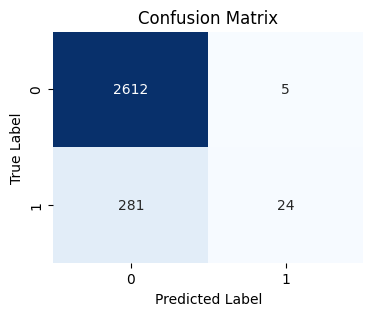

In [10]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))
classification_report_with_confusion_matrix(y_test,y_pred)


## Second Model: Neural Network for Binary Classification

For Gradient-Based Algorithms standartazing is important step

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

X =df.drop(columns='churn',axis=1)
y=df['churn']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
import os

# Setting GPU for computation power. Faster results.
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
#Check
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)), 
    Dense(32, activation='relu', input_shape=(50,)), 
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Calculate class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Fit the model with class weights
history = model.fit(X_train, y_train, batch_size=40, epochs=150, validation_split=0.2, verbose=1, class_weight=class_weight_dict)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
234/234 [==============================] - 8s 6ms/step - loss: 0.6770 - accuracy: 0.5534 - val_loss: 0.6423 - val_accuracy: 0.6003
Epoch 2/150
234/234 [==============================] - 1s 4ms/step - loss: 0.6452 - accuracy: 0.5987 - val_loss: 0.6940 - val_accuracy: 0.5255
Epoch 3/150
234/234 [=========

92/92 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2481
           1       0.28      0.19      0.23       441

    accuracy                           0.80      2922
   macro avg       0.57      0.55      0.56      2922
weighted avg       0.78      0.80      0.79      2922



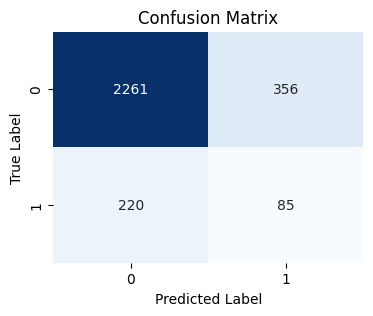

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)
print(classification_report(y_pred_binary,y_test))
classification_report_with_confusion_matrix(y_test,y_pred_binary)


In [ ]:
model.save('../models/NN_model_1.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import os
import datetime

# Setup the ModelCheckpoint callback
checkpoint = ModelCheckpoint('../checkpoints/model_epoch_{epoch:02d}.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True, 
                             mode='auto', 
                             save_freq='epoch')

# Setup the TensorBoard callback
logdir = os.path.join("../logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)


# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)), 
    Dense(512, activation='relu', input_shape=(50,)), 
    Dropout(0.1),
    Dense(512, activation='relu', input_shape=(50,)),
    Dropout(0.1), 
    Dense(512, activation='relu', input_shape=(50,)), 
    Dropout(0.1),
    Dense(256, activation='relu', input_shape=(50,)), 
    Dense(64, activation='relu', input_shape=(50,)),
    Dense(32, activation='relu', input_shape=(50,)), 
    Dropout(0.1),
    Dense(16, activation='relu', input_shape=(50,)), 
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Fit the model with both callbacks
history = model.fit(X_train, y_train, 
                    batch_size=40, 
                    epochs=40, 
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[checkpoint, tensorboard_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               6528      
                                                                 
 dense_27 (Dense)            (None, 512)               66048     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)              

92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2854
           1       0.11      0.49      0.18        68

    accuracy                           0.89      2922
   macro avg       0.55      0.69      0.56      2922
weighted avg       0.97      0.89      0.93      2922



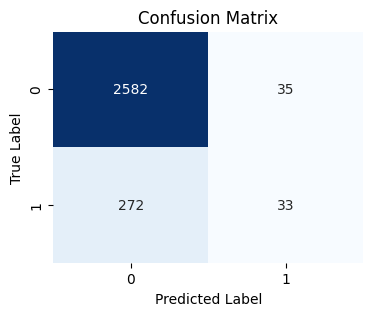

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)
print(classification_report(y_pred_binary,y_test))
classification_report_with_confusion_matrix(y_test,y_pred_binary)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import os
import datetime

# Setup the ModelCheckpoint callback
checkpoint = ModelCheckpoint('../checkpoints/model_epoch_{epoch:02d}.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True, 
                             mode='auto', 
                             save_freq='epoch')

# Setup the TensorBoard callback
logdir = os.path.join("../logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)


# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(51,)), 
    Dropout(0.1),
    Dense(16, activation='relu'), 
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Calculate class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# early_stopping = EarlyStopping(monitor='val_loss', 
#                                min_delta=0, 
#                                patience=100,
#                                verbose=1, 
#                                mode='min', 
#                                baseline=None, 
#                                restore_best_weights=True)

# Fit the model with the callbacks
history = model.fit(X_train, y_train, 
                    batch_size=40, 
                    epochs=500, 
                    validation_split=0.2, 
                    verbose=1, 
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint, tensorboard_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2446
           1       0.29      0.19      0.23       476

    accuracy                           0.79      2922
   macro avg       0.57      0.55      0.55      2922
weighted avg       0.76      0.79      0.77      2922



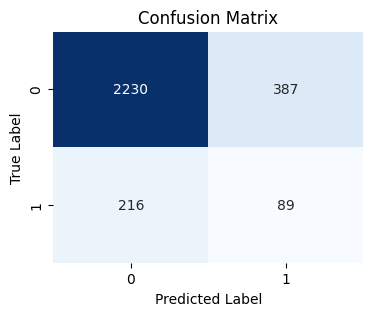

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)
print(classification_report(y_pred_binary,y_test))
classification_report_with_confusion_matrix(y_test,y_pred_binary)

### Results

We have used Random Forest classifier and Sequential NN. The NN model performed better than Random Forest in terms of true positive accuracy. However before concluding the point here, further eda will be done on distribution of values, check skewedness.